# Лабораторная работа №2

## Реализация глубокой нейронной сети

В работе предлагается использовать набор данных _notMNIST_, который состоит из изображений размерностью 28×28 первых 10 букв латинского алфавита (_A_ ... _J_, соответственно). Обучающая выборка содержит порядка 500 тыс. изображений, а тестовая – около 19 тыс.

Данные можно скачать по ссылке:

* https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz (большой набор данных);

* https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz (маленький набор данных);

Описание данных на английском языке доступно по ссылке:
http://yaroslavvb.blogspot.sg/2011/09/notmnist-dataset.html

### Задание 1

Реализуйте полносвязную нейронную сеть с помощью библиотеки _TensorFlow_. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (_Stochastic Gradient Descent_, _SGD_). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

Загрузим файл с датасетом, обработанным в лабораторной работе №1.

In [0]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
BASE_DIR = '/content/drive/My Drive/Colab Files/mo-2'

import sys

sys.path.append(BASE_DIR)

import os

os.chdir(BASE_DIR)

In [0]:
import pandas as pd

dataframe = pd.read_pickle("./large.pkl")

In [5]:
dataframe['data'].shape

(461946,)

In [0]:
! pip install tensorflow-gpu --pre --quiet

In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [0]:
dataframe_test = dataframe.sample(frac = 0.1)

dataframe = dataframe.drop(dataframe_test.index)

In [10]:
x = np.asarray(list(dataframe['data']))[..., np.newaxis]

x = tf.keras.utils.normalize(x, axis = 1)

x.shape

(415751, 28, 28, 1)

In [11]:
x_test = np.asarray(list(dataframe_test['data']))[..., np.newaxis]

x_test = tf.keras.utils.normalize(x_test, axis = 1)

x_test.shape

(46195, 28, 28, 1)

In [0]:
IMAGE_DIM_0, IMAGE_DIM_1 = x.shape[1], x.shape[2]

In [13]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(dataframe['label'].astype('category').cat.codes.astype('int32'))

y.shape

(415751, 10)

In [14]:
y_test = to_categorical(dataframe_test['label'].astype('category').cat.codes.astype('int32'))

y_test.shape

(46195, 10)

In [0]:
LAYER_WIDTH = 5000

In [0]:
CLASSES_N = y.shape[1]

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = tf.keras.Sequential()

model.add(Reshape((IMAGE_DIM_0 * IMAGE_DIM_1,),
                  input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model.add(Dense(LAYER_WIDTH, activation = 'relu'))
model.add(Dense(LAYER_WIDTH, activation = 'sigmoid'))
model.add(Dense(LAYER_WIDTH, activation = 'tanh'))
model.add(Dense(LAYER_WIDTH, activation = 'elu'))
model.add(Dense(LAYER_WIDTH, activation = 'softmax'))
model.add(Dense(CLASSES_N))

In [0]:
def cat_cross_from_logits(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(
        y_true, y_pred, from_logits = True)

model.compile(optimizer = 'sgd',
              loss = cat_cross_from_logits,
              metrics = ['categorical_accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5000)              3925000   
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_4 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5

In [0]:
VAL_SPLIT_RATE = 0.1

In [0]:
EPOCHS_N = 10

In [0]:
history = model.fit(x = x, y = y, epochs = EPOCHS_N,
                    validation_split = VAL_SPLIT_RATE, verbose = 0)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7, 8.27

sns.set()
sns.set_palette(sns.color_palette('hls'))

def plot_accuracy(_history,
                 _train_acc_name = 'accuracy', _val_acc_name = 'val_accuracy'):

    plt.plot(_history.history[_train_acc_name])
    plt.plot(_history.history[_val_acc_name])

    plt.title('Model accuracy')

    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc = 'right')

    plt.show()

def plot_loss(_history):

    plt.plot(_history.history['loss'])
    plt.plot(_history.history['val_loss'])

    plt.title('Model loss')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc = 'right')

    plt.show()

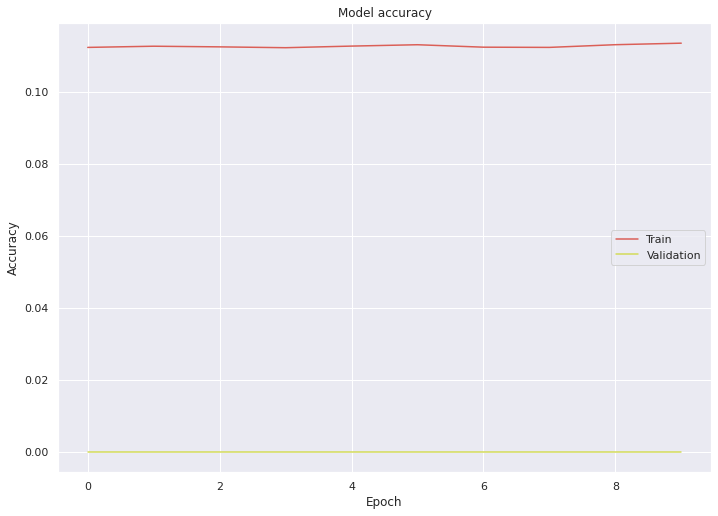

In [24]:
plot_accuracy(history, 'categorical_accuracy', 'val_categorical_accuracy')

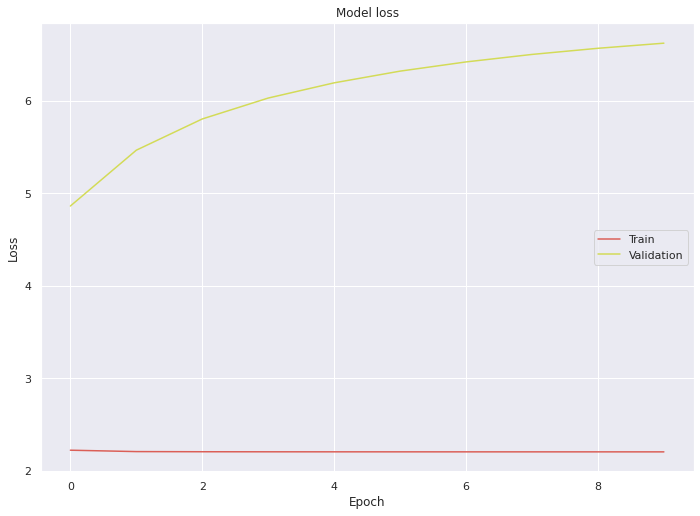

In [25]:
plot_loss(history)

In [26]:
results = model.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results)

1444/1444 [==============================] - 5s 4ms/step - loss: 2.6373 - categorical_accuracy: 0.1020
Test loss, test accuracy: [2.6373043060302734, 0.10204567760229111]


### Задание 2

Как улучшилась точность классификатора по сравнению с логистической регрессией?

Стало хуже &mdash; на тестовой выборке точность составила 10%. Похоже, что данная модель совершенно не подходит для решения этой задачи.

### Задание 3

Используйте регуляризацию и метод сброса нейронов (_dropout_) для борьбы с переобучением. Как улучшилось качество классификации?

In [0]:
REG_RATE = 0.001

In [0]:
from tensorflow.keras.regularizers import l2

l2_reg = l2(REG_RATE)

In [0]:
DROPOUT_RATE = 0.2

In [0]:
from tensorflow.keras.layers import Dropout

dropout_layer = Dropout(DROPOUT_RATE)

In [0]:
model_2 = tf.keras.Sequential()

model_2.add(Reshape((IMAGE_DIM_0 * IMAGE_DIM_1,),
                    input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model_2.add(Dense(LAYER_WIDTH, activation = 'relu',
                  kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'sigmoid',
                  kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'tanh',
                  kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'sigmoid',
                  kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(LAYER_WIDTH, activation = 'relu',
                  kernel_regularizer = l2_reg))
model_2.add(dropout_layer)
model_2.add(Dense(CLASSES_N))

In [0]:
model_2.compile(optimizer = 'sgd',
                loss = cat_cross_from_logits,
                metrics = ['categorical_accuracy'])

In [33]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5000)              3925000   
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_8 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_9 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_10 (Dense)             (None, 5000)             

In [0]:
history_2 = model_2.fit(x = x, y = y, epochs = EPOCHS_N,
                        validation_split = VAL_SPLIT_RATE, verbose = 0)

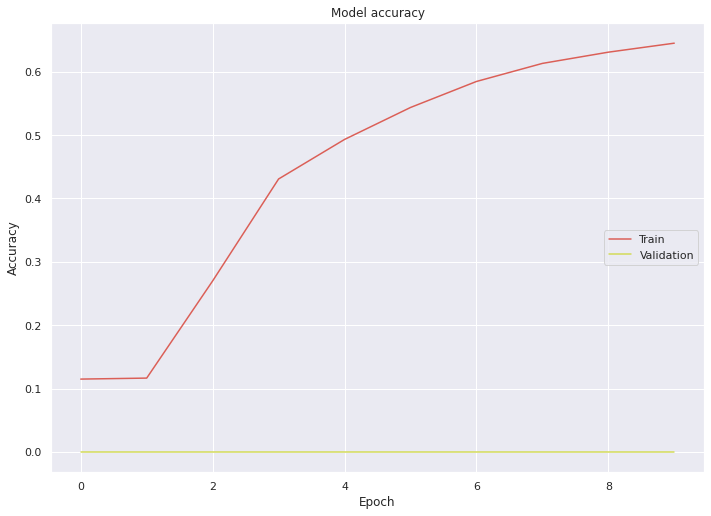

In [35]:
plot_accuracy(history_2, 'categorical_accuracy', 'val_categorical_accuracy')

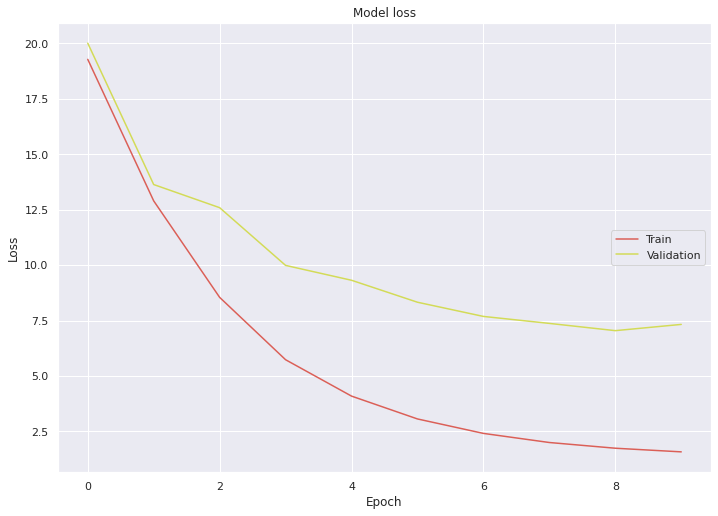

In [36]:
plot_loss(history_2)

In [37]:
results_2 = model_2.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results_2)

1444/1444 [==============================] - 8s 6ms/step - loss: 2.0460 - categorical_accuracy: 0.6126
Test loss, test accuracy: [2.046029567718506, 0.6125987768173218]


Регуляризация и сброс нейронов значительно помогли &mdash; модель показывает 61% точности на тестовой выборке.

### Задание 4

Воспользуйтесь динамически изменяемой скоростью обучения (_learning rate_). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?

In [0]:
from tensorflow.keras.optimizers import SGD

dyn_lr_sgd = SGD(lr = 0.01, momentum = 0.9)

model_2.compile(optimizer = dyn_lr_sgd,
                loss = cat_cross_from_logits,
                metrics = ['categorical_accuracy'])

history_3 = model_2.fit(x = x, y = y, epochs = EPOCHS_N,
                        validation_split = VAL_SPLIT_RATE, verbose = 0)

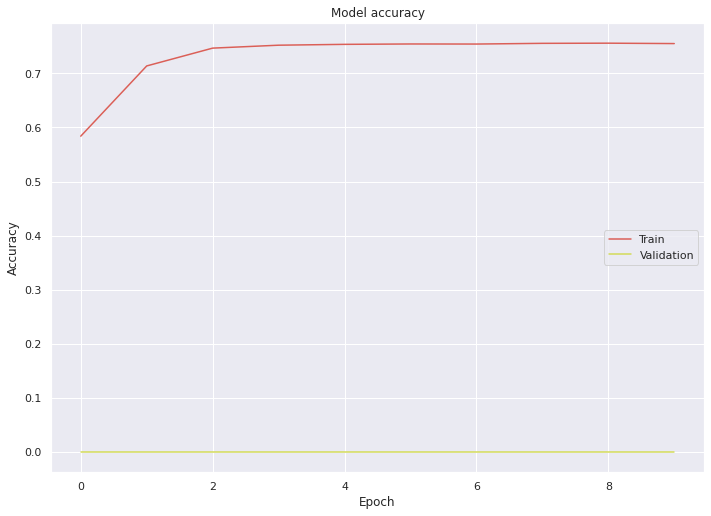

In [39]:
plot_accuracy(history_3, 'categorical_accuracy', 'val_categorical_accuracy')

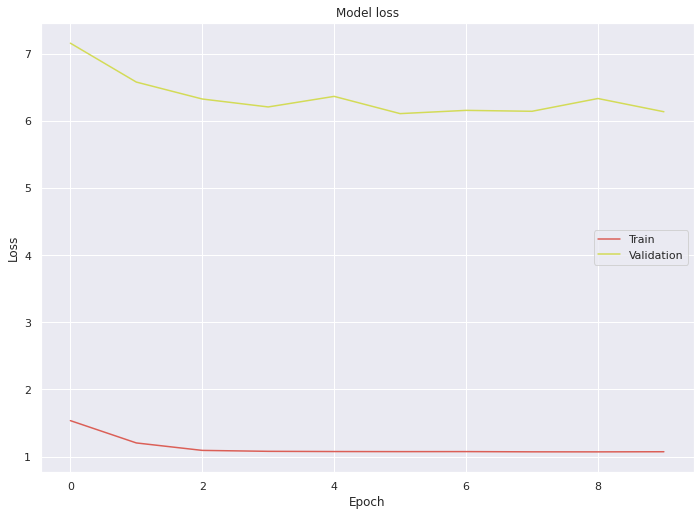

In [40]:
plot_loss(history_3)

In [41]:
results_3 = model_2.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results_3)

1444/1444 [==============================] - 8s 6ms/step - loss: 1.5419 - categorical_accuracy: 0.6827
Test loss, test accuracy: [1.5419150590896606, 0.6827362179756165]


Динамически изменяемая скорость обучения улучшила результат &mdash; 68% на тестовой выборке.

Можно сделать вывод, что модель с полносвязными слоями может использоваться для решения задачи распознавания изображений, однако она очевидно не является наилучшей.